In [1]:
#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# la ligne ici est ajouté principalement pour SVC dont des mises à jour
# sont annoncées mais jamais mise à jour :)

import pandas as pd
import numpy as np 
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('claim.csv', sep=',')

In [3]:
nbLignes, nbColonnes = df.shape
print"On a", nbLignes, "lignes et", nbColonnes,"colonnes"

print("Cinq premières lignes du dataframe :")
display(df[:5])
# ou :
#display(df.head(5))

print("Information sur le dataframe : ")

print (df.info())

On a 39218 lignes et 23 colonnes
Cinq premières lignes du dataframe :


,Unnamed: 0,claimReview_author,claimReview_author_name,claimReview_author_url,claimReview_claimReviewed,claimReview_datePublished,claimReview_source,claimReview_url,creativeWork_author_name,creativeWork_author_sameAs,...,extra_entities_body,extra_entities_claimReview_claimReviewed,extra_entities_keywords,extra_refered_links,extra_tags,extra_title,rating_alternateName,rating_bestRating,rating_ratingValue,rating_worstRating
0,0,NaN,snopes,NaN,Finnish President Sauli Niinistö posted a vide...,2019-10-07,snopes,https://www.snopes.com/fact-check/president-fi...,NaN,NaN,...,"[{""id"" : 33057"",""""begin"": 46,""end"": 57,""entity...","[{""id"" : 1042690"",""""begin"": 18,""end"": 32,""enti...",[],"https://t.co/Oo5Q56ALAu,https://twitter.com/ia...",NaN,Did the President of Finland Post a Video Resp...,False,NaN,NaN,NaN
1,1,NaN,snopes,NaN,A supporter of U.S. Rep. Alexandria Ocasio-Cor...,2019-10-04,snopes,https://www.snopes.com/fact-check/babies-clima...,NaN,NaN,...,"[{""id"" : 645042"",""""begin"": 33,""end"": 46,""entit...","[{""id"" : 54885332"",""""begin"": 22,""end"": 45,""ent...",[],https://twitter.com/redsteeze/status/117991491...,NaN,Did an AOC Supporter Suggest ‘Eating Babies’ t...,Mixture,NaN,NaN,NaN
2,2,NaN,snopes,NaN,A photograph shows a bride and groom during a ...,2019-10-04,snopes,https://www.snopes.com/fact-check/handmaid-tal...,NaN,NaN,...,"[{""id"" : 50430110"",""""begin"": 91,""end"": 106,""en...","[{""id"" : 50430110"",""""begin"": 46,""end"": 61,""ent...",[],https://twitter.com/God_loves_women/status/117...,NaN,Is This a Photo of a ‘Handmaid’s Tale’-Themed ...,Miscaptioned,NaN,NaN,NaN
3,3,NaN,snopes,NaN,Canada legalized the medicinal use of cocaine.,2019-10-04,snopes,https://www.snopes.com/fact-check/medicinal-co...,NaN,NaN,...,"[{""id"" : 7701"",""""begin"": 96,""end"": 103,""entity...","[{""id"" : 7701"",""""begin"": 38,""end"": 45,""entity""...",[],https://web.archive.org/web/20191004171021/htt...,NaN,Did Canada Legalize the Medicinal Use of Cocaine?,Labeled Satire,NaN,NaN,NaN
4,4,NaN,snopes,NaN,"In September 2019, U.S. President Donald Trump...",2019-10-04,snopes,https://www.snopes.com/fact-check/trump-autism...,NaN,NaN,...,"[{""id"" : 4848272"",""""begin"": 121,""end"": 133,""en...","[{""id"" : 4848272"",""""begin"": 31,""end"": 43,""enti...",[],"http://archive.is/ymlJP,http://archive.is/JgYP...",NaN,Did Donald Trump Sign a $1.8 Billion Autism-Se...,True,NaN,NaN,NaN


Information sur le dataframe : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39218 entries, 0 to 39217
Data columns (total 23 columns):
Unnamed: 0                                  39218 non-null int64
claimReview_author                          0 non-null float64
claimReview_author_name                     39218 non-null object
claimReview_author_url                      0 non-null float64
claimReview_claimReviewed                   39216 non-null object
claimReview_datePublished                   37913 non-null object
claimReview_source                          39218 non-null object
claimReview_url                             39218 non-null object
creativeWork_author_name                    17481 non-null object
creativeWork_author_sameAs                  1310 non-null object
creativeWork_datePublished                  17547 non-null object
extra_body                                  38866 non-null object
extra_entities_author                       39218 non-null object
extra_ent

Nombre de colonne où il y a au moins une valeur nulle : 15


['claimReview_author',
 'claimReview_author_url',
 'claimReview_claimReviewed',
 'claimReview_datePublished',
 'creativeWork_author_name',
 'creativeWork_author_sameAs',
 'creativeWork_datePublished',
 'extra_body',
 'extra_refered_links',
 'extra_tags',
 'extra_title',
 'rating_alternateName',
 'rating_bestRating',
 'rating_ratingValue',
 'rating_worstRating']

Heatmap des valeurs manquantes :


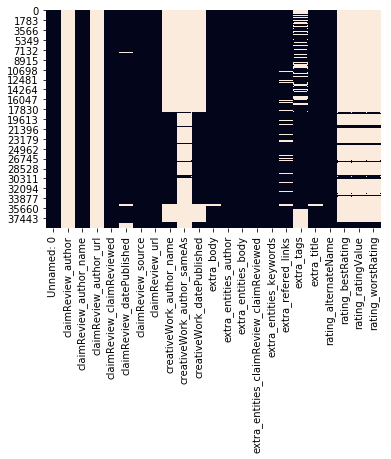

In [11]:
sns.heatmap(df.isnull(), cbar=False)

colonnesNonCompletes = []

i=0
for colonne in df.columns.values:
        if(df[colonne].isnull().any()):
            i+=1
            colonnesNonCompletes.append(colonne)

print "Nombre de colonne où il y a au moins une valeur nulle :", i
print ""
display(colonnesNonCompletes)

print "Heatmap des valeurs manquantes :"

La première phase du projet consiste à faire du feature engineering. C'est à dire qu'il faudra utiliser des méthodes de traitement de données afin de préparer notre dataset à la phase de 

In [7]:
array = df.values
display(array)

array([[0, nan, 'snopes', ..., nan, nan, nan],
       [1, nan, 'snopes', ..., nan, nan, nan],
       [2, nan, 'snopes', ..., nan, nan, nan],
       ...,
       [676, nan, 'factcheck_afp', ..., 5.0, 3.0, 1.0],
       [677, nan, 'factcheck_afp', ..., 5.0, 3.0, 1.0],
       [678, nan, 'factcheck_afp', ..., 5.0, 1.0, 1.0]], dtype=object)